# Project: Investigating the TBDb dataset for trends in Data.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    * <a href = "#question1">Question1</a>
    * <a href = "#question2">Question2</a>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This project used TMDb movie Dataset that contains about 10,000 movies collected from TMDb. Each movie includeed information on its user rating, revenue, cast, genres, etc. The goal of this investigation is to analyze insights abonout movie features to help movie industry to earn more profits.

**The project follow the steps**

**Assess the Data**: Download and upload the file to workbook.

**Data Wrangling**: Remove unnessary information such as empty and duplicate values. The whole dataframe was also fixed in order to summarize results.

**Exploratory Data analysis**: Study the statistics and build visualization to analyze relationships between each others.

**Communicate the results**: Use the above fundings to answer questions, then make conclusion.

>Questions to be answered:

>Which movies are the most profitable to the market?
Which movies have the most and the least profit, budget and runtime?
How does popularity affect the profit?
Which years do movies made the most profit?
what are the top casts, directors and genres?
Which months have higher movies profits?

**Importing Libraries**

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML

**Load Data frame**

In [4]:
df = pd.read_csv('tmdb-movies.csv')

# Data Wrangling Process

**In this section we will be gathering required data, Checking for usefull data, get more insights of data and the overall structure.**

Checking the file for corruption:

In [5]:
df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline      ...       \
0           The park is open.      ...        
1          What a Lovely Day.      ...        
2  One Choice Can Destroy You      ...        

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

As the Column names and indexs are not jumbled or out of space, now we will concertrate more on data cleaning are gathering useful data from these.

In [6]:
df.shape

(10866, 21)

We'll be analyzing a dataframe with 21 columns and 10866 entries. We notice that the columns “cast”, “genres” and “production_companies” contain multiple values separated by the '|' character.

In [7]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0.000000e+00  0.000000e+00      0.000000   
25%     10596.250000      0.207583  0.000000e+00  0.000000e+00     90.000000   
50%     20669.000000      0.383856  0.000000e+00  0.000000e+00     99.000000   
75%     75610.000000      0.713817  1.500000e+07  2.400000e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

There are several columns with missing values. For example, "homepage" has only 2936 values, and "tagline" has 8042 values. As, all these columns do not make any sense for further analyzing and can be dropped. 
Now, drop all unnecessary columns.

# Data Cleaning

**In this section we will be cleaning data by dropping not reuquired columns and changing the data types to required data types for better evaluation of data.**

In [9]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.shape

(10866, 15)

The count of the columns have reduced to 15 from 21 in number, as we dropped our not required columns.

Next step will be to change Data Type of "release_date".

We notice that "release_date" Dtype is the object. It means the date is in string format. It's better to convert it to the special datetime format.

In [10]:
df.release_date = pd.to_datetime(df['release_date'])

In [11]:
#Checking the data for types now,
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

To get more insights, a more descriptive statistics need to be generated.

**Generate descriptive Statistics**

In [12]:
# Learn more about data
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  1.086600e+04  1.086600e+04  10866.000000  10866.000000   
mean       0.646441  1.462570e+07  3.982332e+07    102.070863    217.389748   
std        1.000185  3.091321e+07  1.170035e+08     31.381405    575.619058   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.207583  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.383856  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.713817  1.500000e+07  2.400000e+07    111.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean       5.974922   2001.322658  1.755104e+07  5.136436e+07  
std        0.935142     12.812941  3.430616e+07  1.446325e+08  
min        1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%        5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%        6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%        6.600000   2011.000000  2.085325e+07  3.369710e+07  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

It can be clearly seen that:
* Most number of movies are released in 2000s,
* Maximum Budget allocated for a movie is around 42 Million USD
* The columns "budget", "budget_adj", "revenue", "revenue_adj", and "runtime" have zero values.
* As, these values can't be zero these need to be replaced with "NaN" so they’ll not influence the statistics.

**Replace Zero Values with "NaN"**

In [13]:
#For budget column
df['budget']=df['budget'].replace(0, np.nan)

#For budget_adj column
df['budget_adj']=df['budget_adj'].replace(0, np.nan)

#For revenue column
df['revenue']=df['revenue'].replace(0, np.nan)

#For revenue_adj column
df['revenue_adj']=df['revenue_adj'].replace(0, np.nan)

#For runtime column
df['runtime']=df['runtime'].replace(0, np.nan)

In [14]:
# Check for changes
df.describe()

popularity        budget       revenue       runtime    vote_count  \
count  10866.000000  5.170000e+03  4.850000e+03  10835.000000  10866.000000   
mean       0.646441  3.073943e+07  8.922066e+07    102.362898    217.389748   
std        1.000185  3.890065e+07  1.620684e+08     30.946957    575.619058   
min        0.000065  1.000000e+00  2.000000e+00      2.000000     10.000000   
25%        0.207583  6.000000e+06  7.708081e+06     90.000000     17.000000   
50%        0.383856  1.700000e+07  3.182654e+07     99.000000     38.000000   
75%        0.713817  4.000000e+07  9.991823e+07    112.000000    145.750000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  5.170000e+03  4.850000e+03  
mean       5.974922   2001.322658  3.688774e+07  1.150774e+08  
std        0.935142     12.812941  4.195701e+07  1.988419e+08  
min        1.500000   1960.000000  9.210911e-01  2.370705e+00  
25%        5.400000   1995.000000  8.102293e+06  1.046262e+07  
50%        6.000000   2006.000000  2.272271e+07  4.392749e+07  
75%        6.600000   2011.000000  5.007483e+07  1.315644e+08  
max        9.200000   2015.000000  4.250000e+08  2.827124e+09

Use matplotlib inline to get more insights of data and the trends of graphs

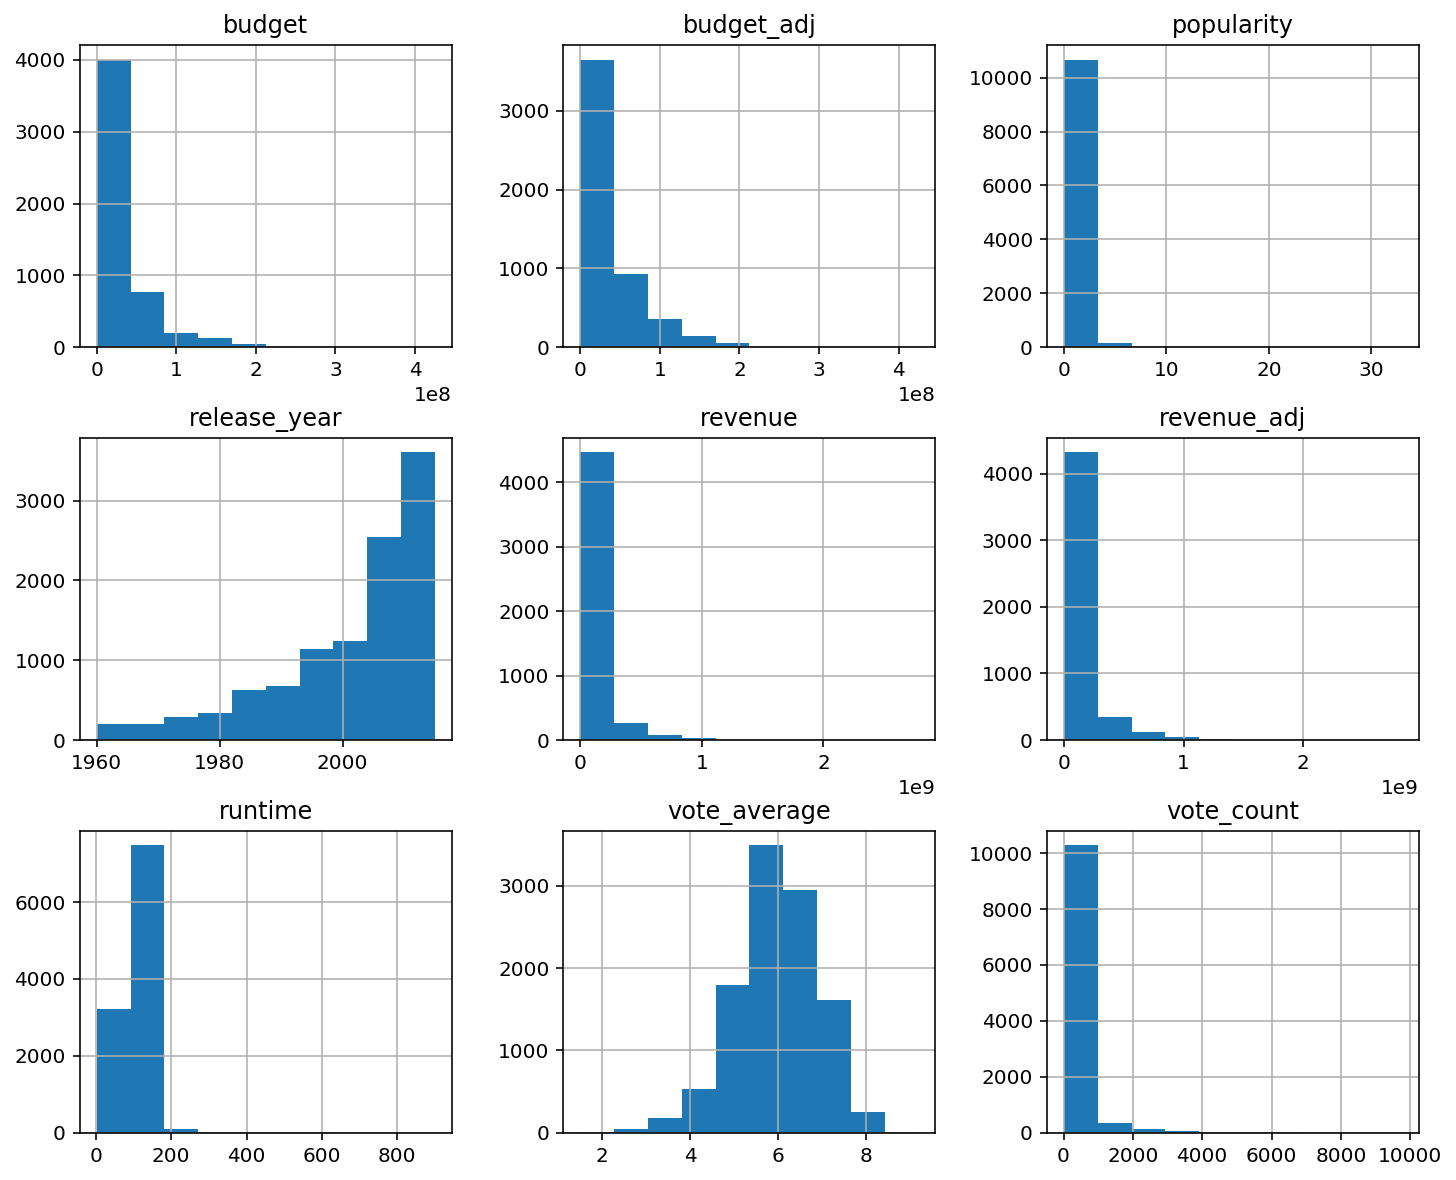

In [15]:
df.hist(figsize=(12,10));

* Most variables are skewed to right except the vote_average and release_year

In [16]:
df.mean()

popularity      6.464410e-01
budget          3.073943e+07
revenue         8.922066e+07
runtime         1.023629e+02
vote_count      2.173897e+02
vote_average    5.974922e+00
release_year    2.001323e+03
budget_adj      3.688774e+07
revenue_adj     1.150774e+08
dtype: float64

**More points to note:**

* Histograms labeled “budget”, “revenue”, "popularity", "vote_count" are extremely right-skewed. 

* The max values of these columns stand out from all of the other numbers. For example, the mean value of "popularity" is around 0.64, the standard deviation is around 1.0, and 75% of the values are lower than 1.0, but the max value is almost 33!
* The histogram of "release_year" is left-skewed, which means the number of movie releases increased every year.
* The histogram of "vote_average" is almost normally distributed as it should be.

In [17]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
popularity              10866 non-null float64
budget                  5170 non-null float64
revenue                 4850 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10835 non-null float64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              5170 non-null float64
revenue_adj             4850 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(5)
memory usage: 1.2+ MB


**The columns with null values makes no sense to be dropped, we can use all the data to answer the questions.**

<a id='eda'></a>
## Exploratory Data Analysis

> As the Data is trimmed and cleaned data, its ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions posed in the Introduction section.

<a id='question1'></a>
### Question 1

# Which genres are most popular from year to year ?

Previously we mentioned that “genres” column contains multiple values separated by the '|' character. So we have to split them in order to create a list of all genres.

**Splitting concated values:**

In [18]:
genres = df.genres.str.split('|', expand=True).stack().value_counts().index
print("Number of genres is {}".format(genres.size))

Number of genres is 20


We have 20 genres overall. Let's create a color map for them, so that every genre will have a unique color. Choosing colors is a very complicated task, so we’ll use the built-in matplotlib “tab20” colormap that has exactly 20 colors with a good-looking palette.

**Creating color map for visulization**

In [19]:
colors_map = {}
cm = plt.cm.get_cmap('tab20')
#we have 20 colors in [0-1] range
#so start from 0.025 and add 0.05 every cycle
#this way we get different colors for
#every genres
off = 0.025
for genre in genres:
    colors_map[genre] = cm(off)
    off += 0.05

**Let's create a function that returns a sorted dataframe with dependency of values from a multiple value column and a single value column. This will help us to analyse all multiple values columns.**

In [20]:
def get_mdepend(df, multival_col, qual_col):
    #split column by '|' character and stack
    split_stack = df[multival_col].str.split('|', expand=True).stack()
    #convert series to frame
    split_frame = split_stack.to_frame(name=multival_col)
    #drop unneeded index
    split_frame.index = split_frame.index.droplevel(1)
    #add qual_col, group and find average
    dep = split_frame.join(df[qual_col]).groupby(multival_col).mean()
    #return sorted dependency
    return dep.sort_values(qual_col) 

**Next step:**
Create a function that plots our horizontal bar chart with the popularity of movies for all genres up to the desired year.

In [21]:
def draw_barchart(current_year):
    #get data only up to current_year
    dep = get_mdepend(df.query('release_year <= {}'.format(current_year)),
                         'genres', 'popularity')
    #clear before draw
    ax.clear()
    #plot horizontal barchart using our colormap
    ax.barh(dep.index,
            dep['popularity'].tolist(),
            color=[colors_map[x] for x in dep.index])
    #plot genres and values
    dx = dep.max() / 200
    for i, (value,
            name) in enumerate(zip(dep['popularity'].tolist(), dep.index)):
        #genre name
        ax.text(value - dx,
                i,
                name,
                size=14,
                weight=600,
                ha='right',
                va='center')
        #genre value
        ax.text(value + dx,
                i,
                f'{value:,.2f}',
                size=14,
                ha='left',
                va='center')

    #big current year
    ax.text(1,
            0.2,
            current_year,
            transform=ax.transAxes,
            color='#777777',
            size=46,
            ha='right',
            weight=800)
    #plot caption of ticks
    ax.text(0,
            1.065,
            'Popularity',
            transform=ax.transAxes,
            size=14,
            color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    #chart caption
    ax.text(0,
            1.16,
            'Popularity of movie genres from 1960 to 2015',
            transform=ax.transAxes,
            size=24,
            weight=600,
            ha='left',
            va='top')

**Creat bar chart and show**

In [22]:
#create figure
fig, ax = plt.subplots(figsize=(10, 7))
#remove borders
plt.box(False)
#immediately close it to not provide additional figure 
#after animation block
plt.close()
animator = animation.FuncAnimation(fig,
                                   draw_barchart,
                                   frames=range(1960, 2016),
                                   interval=666)
#add space before animation
print('')
HTML(animator.to_jshtml())

The visulas clearly answer our question of most popular generes by year to year, seems like we are repeating the history.

<a id='question2'></a>
### Question 2

# What properties are associated with highly profitable movies?

**Data Preperation**

* We have to get data only with the budget and revenue values available.
* We will use adjusted values so that money inflation doesn't interfere with our calculations.

In [23]:
dfp = df[df.budget_adj.notnull() & df.revenue_adj.notnull()].copy()
dfp['profit'] = dfp.revenue_adj - dfp.budget_adj

**Correlation**

* To find corelation of any attribute with profit, lets make histogram for all of the properties:

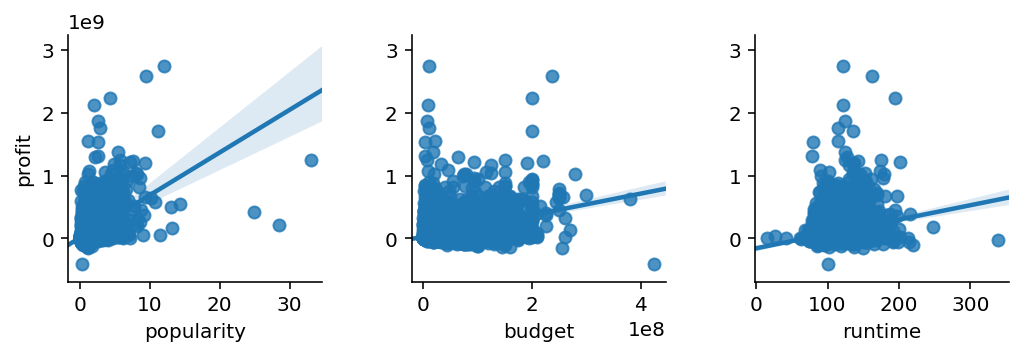

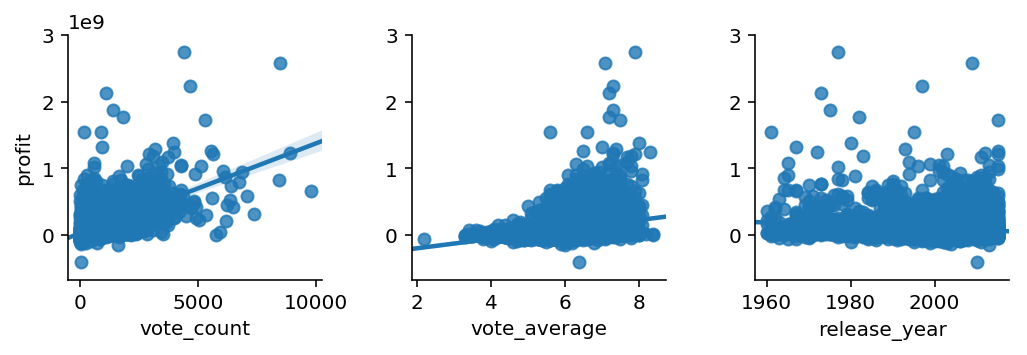

In [29]:
sns.pairplot(data=dfp,
             x_vars=['popularity', 'budget', 'runtime'],
             y_vars=['profit'],
             kind='reg');
sns.pairplot(data=dfp,
             x_vars=['vote_count', 'vote_average', 'release_year'],
             y_vars=['profit'],
             kind='reg');

**popularity** and **vote_count** have a positive correlation with profit. Obviously, the more people who watch the movie, the more revenue it gets.

**budget** has a small positive correlation with profit. So we can conclude that higher investments in movies cause higher revenues.

Surprisingly, **vote_average** has a weak positive correlation with profit.

### Setup Default Plot

Let's configure the default parameters for our plots, such as figure size and font sizes.

In [30]:
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (10, 8),
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'xx-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
plt.rcParams.update(params)

**Implementing a function to plot a profit chart**

In [52]:
def profit_chart(df, title, type_of):
    #create figure
    ax = df.plot(kind='barh')
    #remove legend from plot
    ax.get_legend().remove()
    #set custom axis formatter for millions
    ax.xaxis.set_major_formatter(
        ticker.FuncFormatter(lambda x, p: format(int(x / 1e6), ',')))
    #set titles and labels
    plt.title(title)
    plt.xlabel('Average Profit ($ million)')
    if type_of == 'genre':
        plt.ylabel('Genres')
    elif type_of == 'Company':
        plt.ylabel('Production House')
    else:
        plt.ylabel('Actors')

## Genre

Relation of profit with genre.

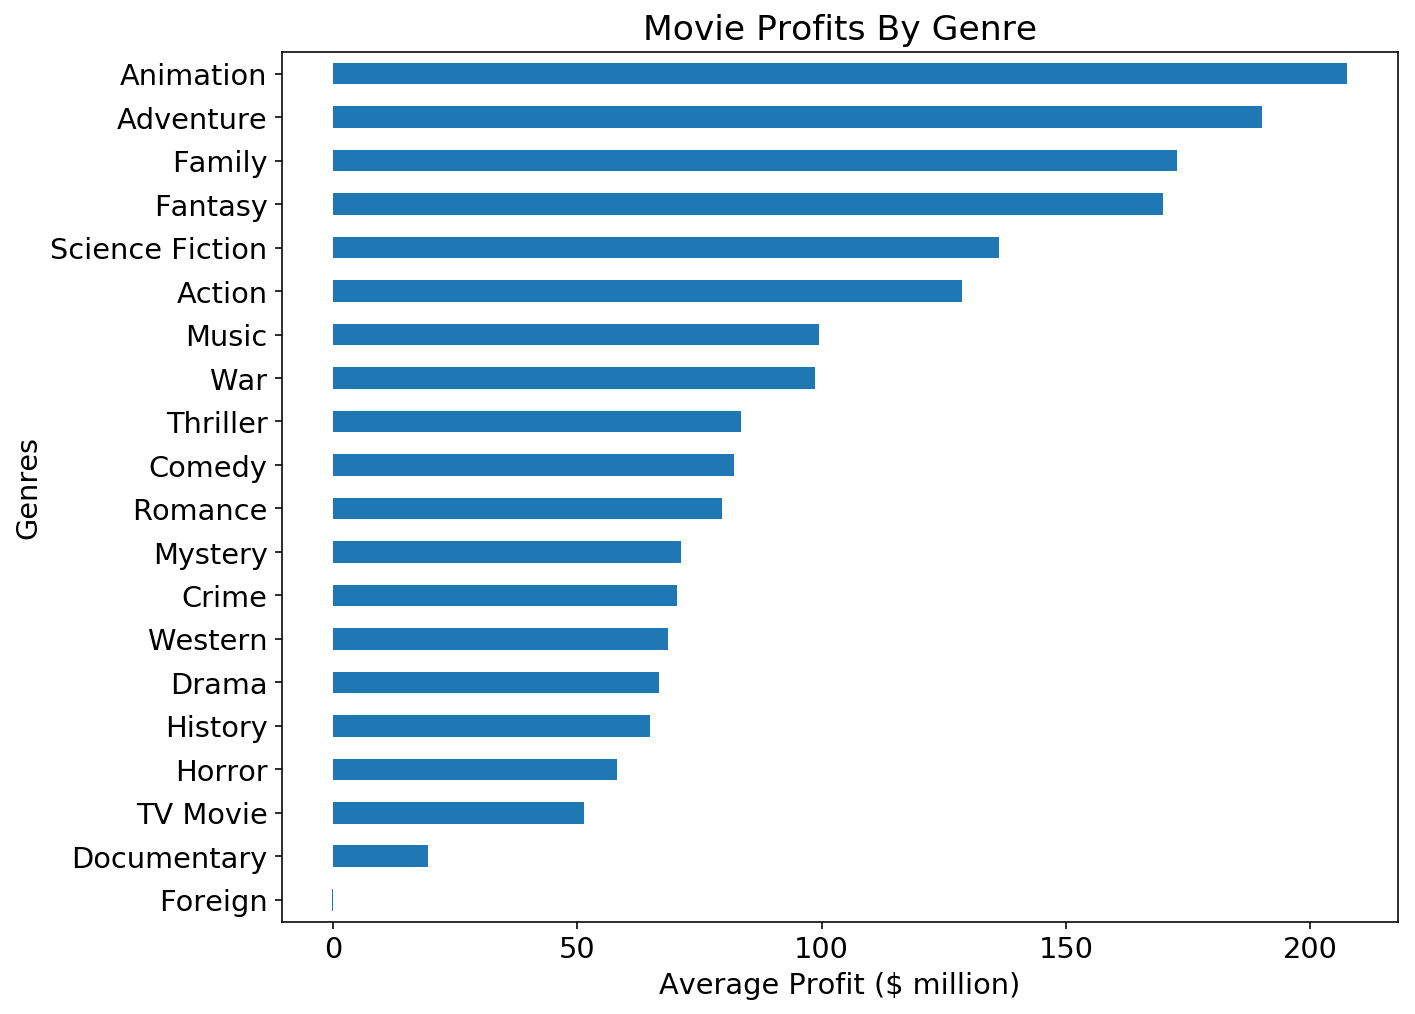

In [54]:
profit_chart(get_mdepend(dfp, 'genres', 'profit'), 'Movie Profits By Genre','genre')

## Production company:

Find the most profitable production house:

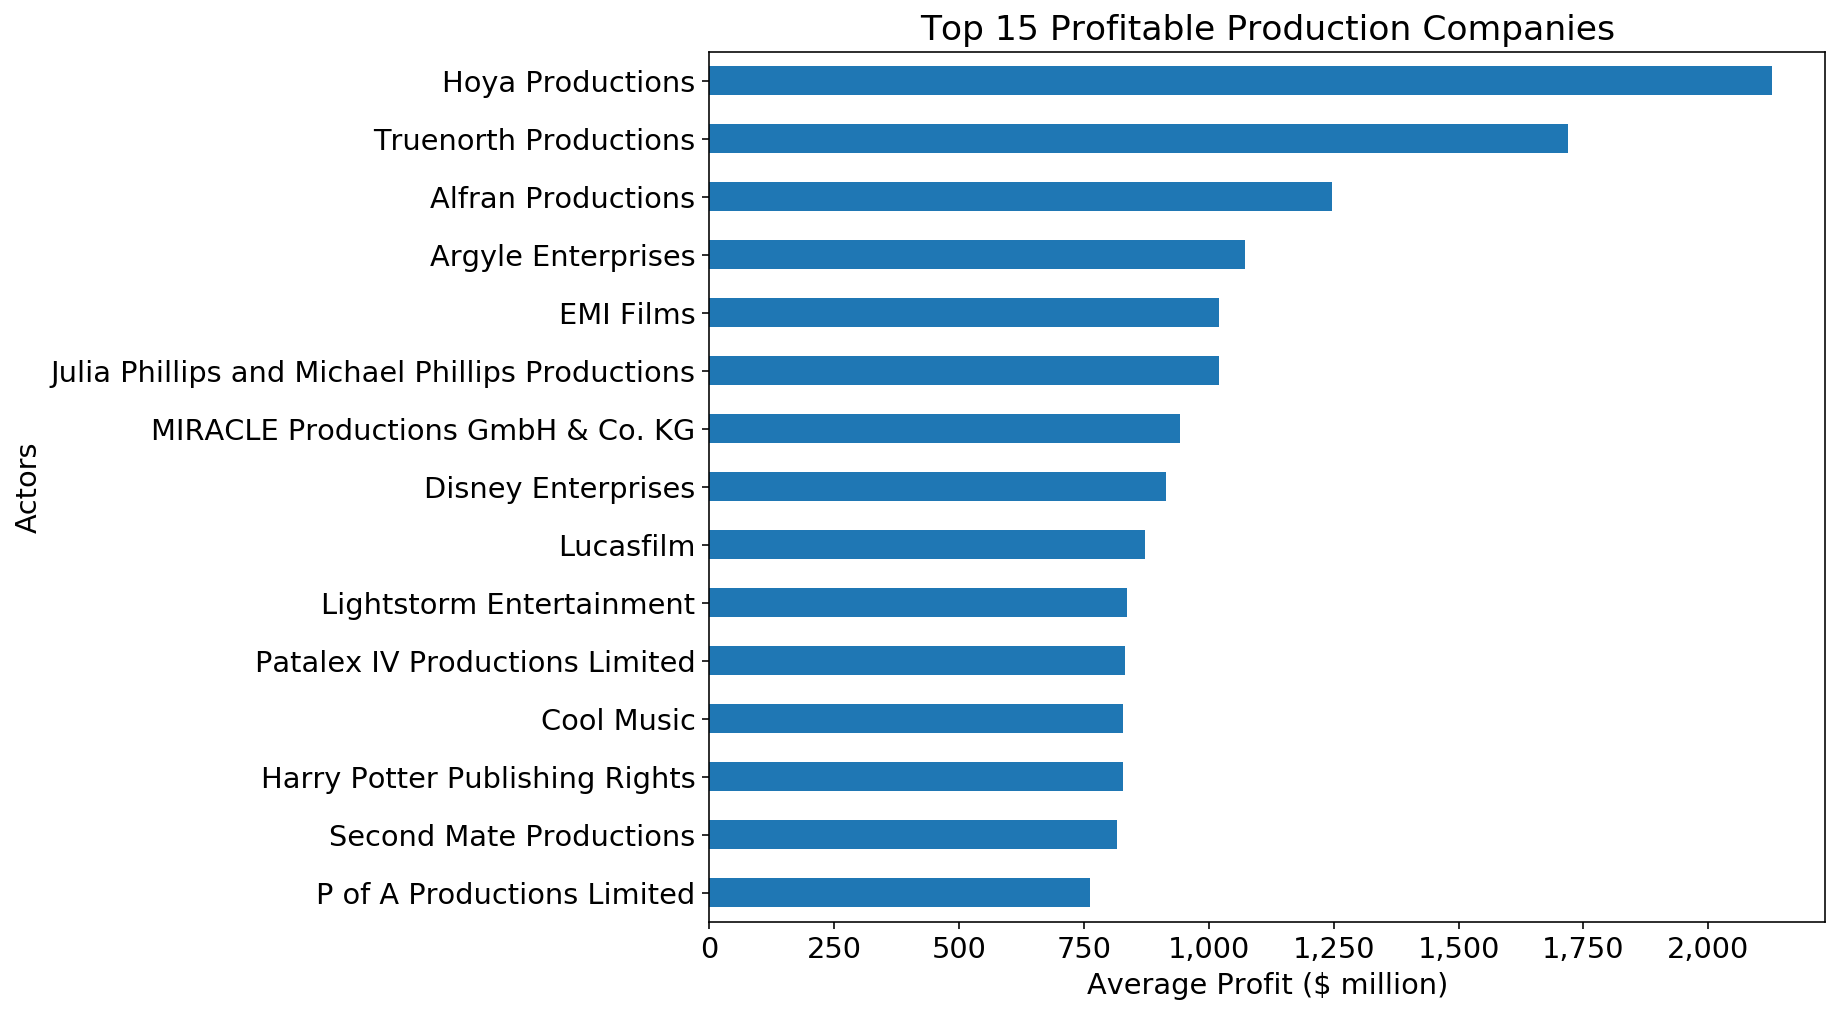

In [57]:
profit_chart(
    #last 10 values
    get_mdepend(dfp, 'production_companies', 'profit').tail(15),
    'Top 15 Profitable Production Companies', 'Production House')

As can be seen **Hoya Productions** is the most profitable.

## Cast

* Our next step is to find most profitable cast.
* We will split the names from the data and compare them with profits gathered over the movies.

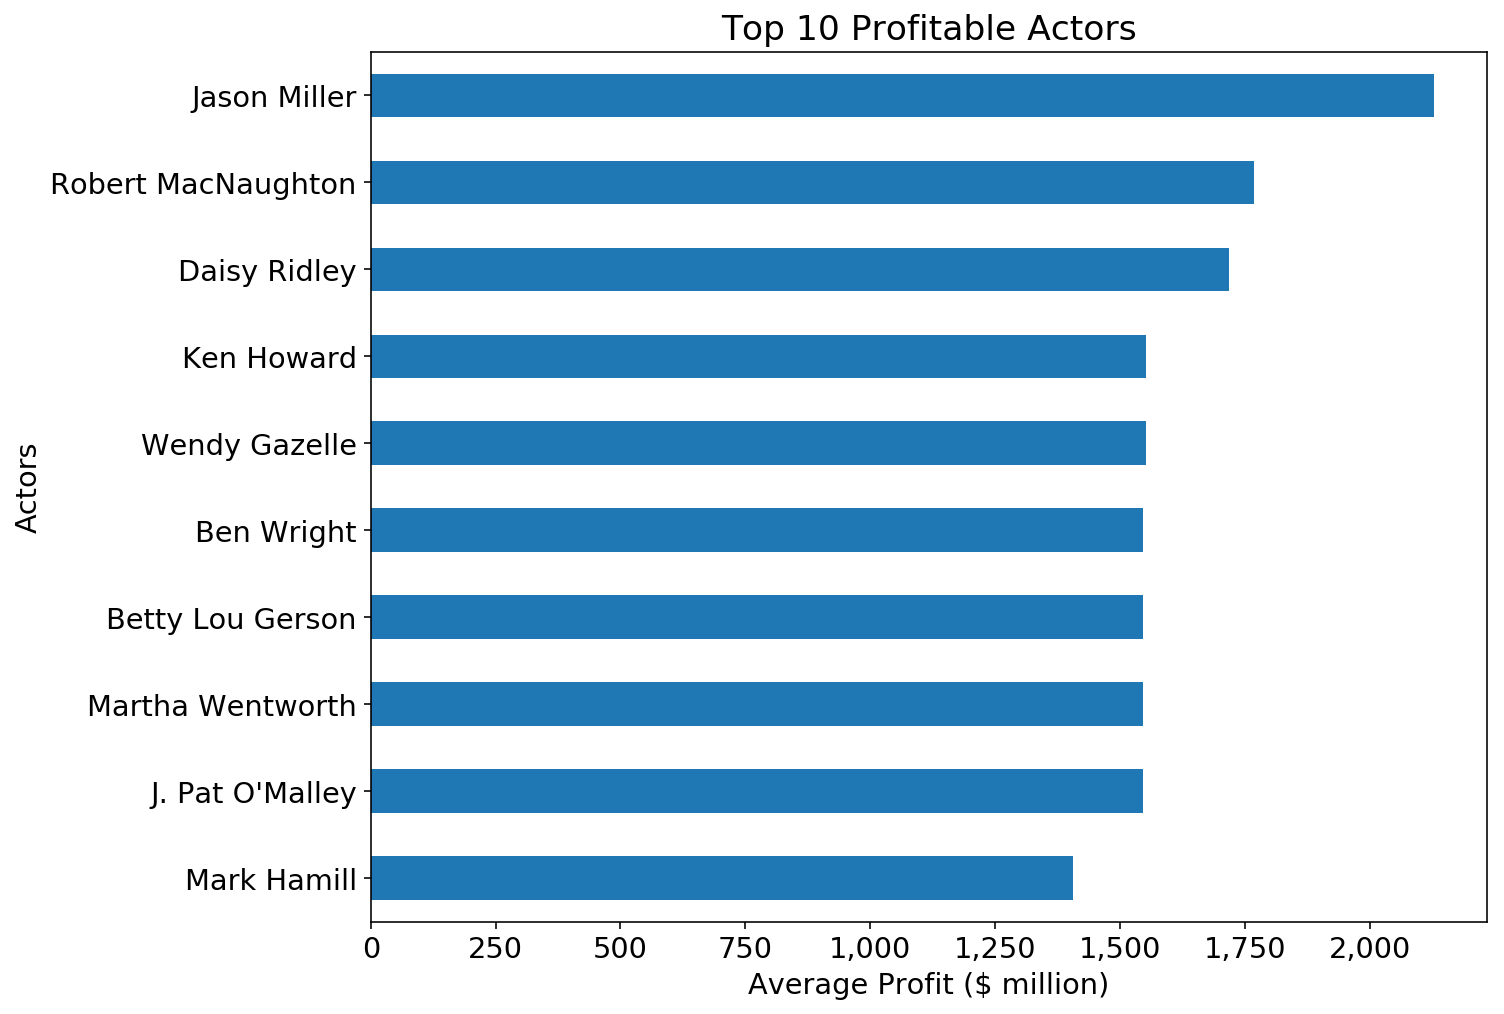

In [58]:
profit_chart(
    get_mdepend(dfp, 'cast', 'profit').tail(10), 'Top 10 Profitable Actors', 'Actors')

## Release Year

Further is the analysis of Data based on the release year, to find if movies over time have become more proftibale.
* This analysis can answer many questions realted to investment, like if movie business has become favourable for investors/producers?

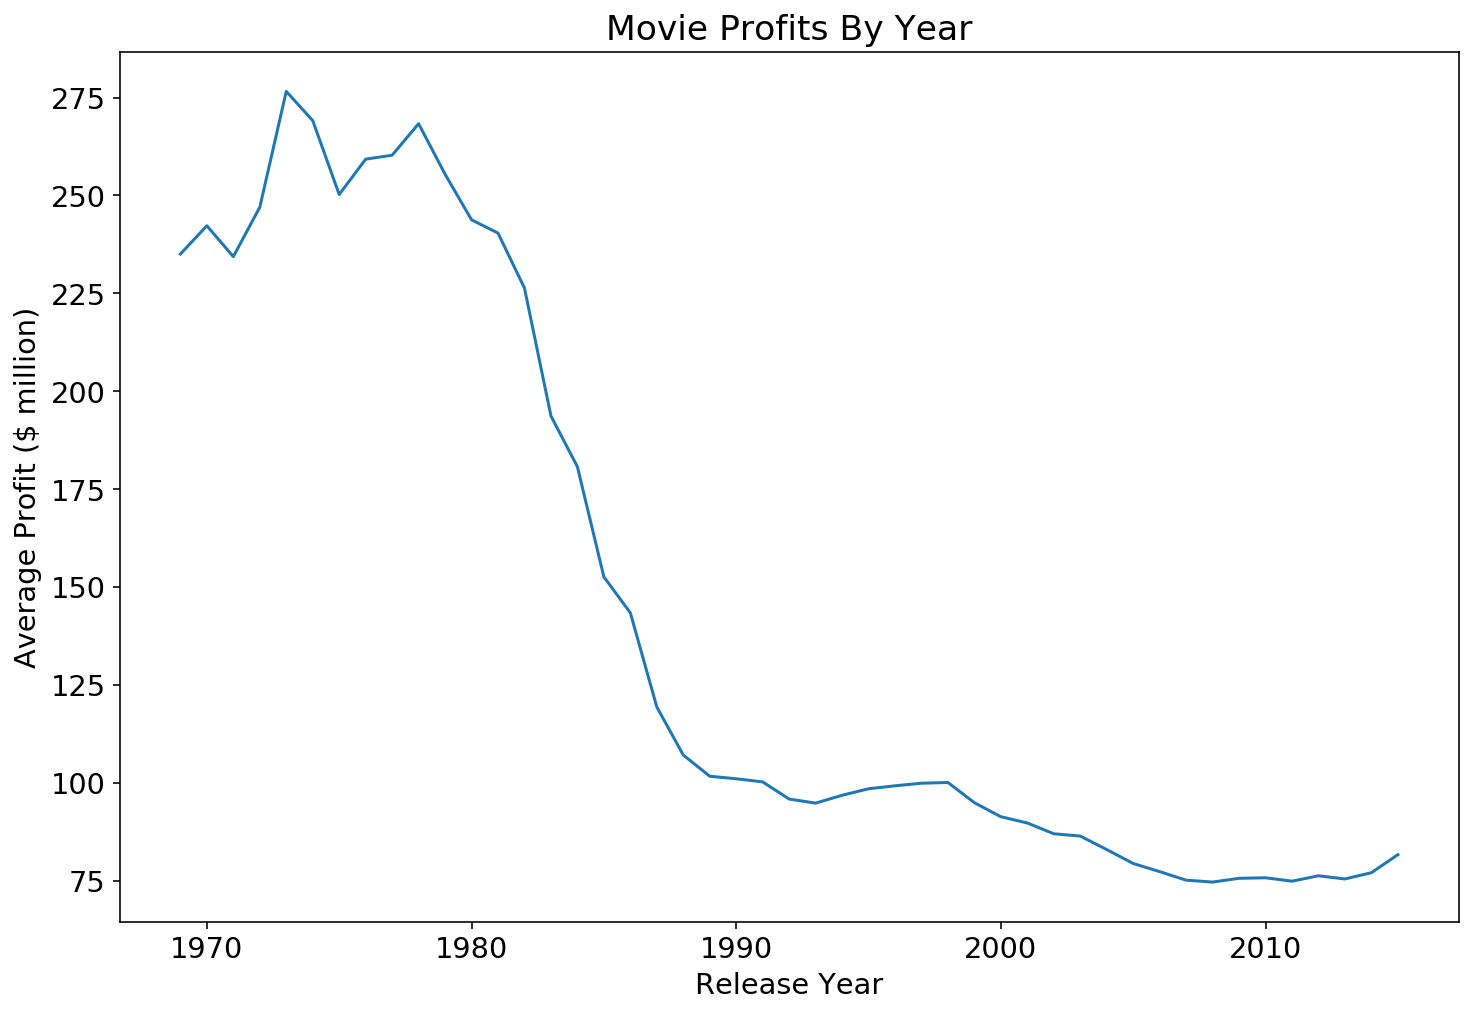

In [59]:
year_profit_mean = dfp.groupby('release_year')['profit'].mean()
#rolling average over 10-years
year_profit_rol = year_profit_mean.rolling(window=10).mean()

ax = year_profit_rol.plot(figsize=(12, 8))
#set custom axis formatter
ax.yaxis.set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y / 1e6), ',')))
#set titles and labels
plt.title('Movie Profits By Year')
plt.ylabel('Average Profit ($ million)')
plt.xlabel("Release Year");

### This is quite strange to see the trend, By the growing economy the movie business has increased and so has the budget of the movies. This conveys that there is a relation among other attribute,

Lets create a comparison where we will determine if number of movies released per year as any effect ?

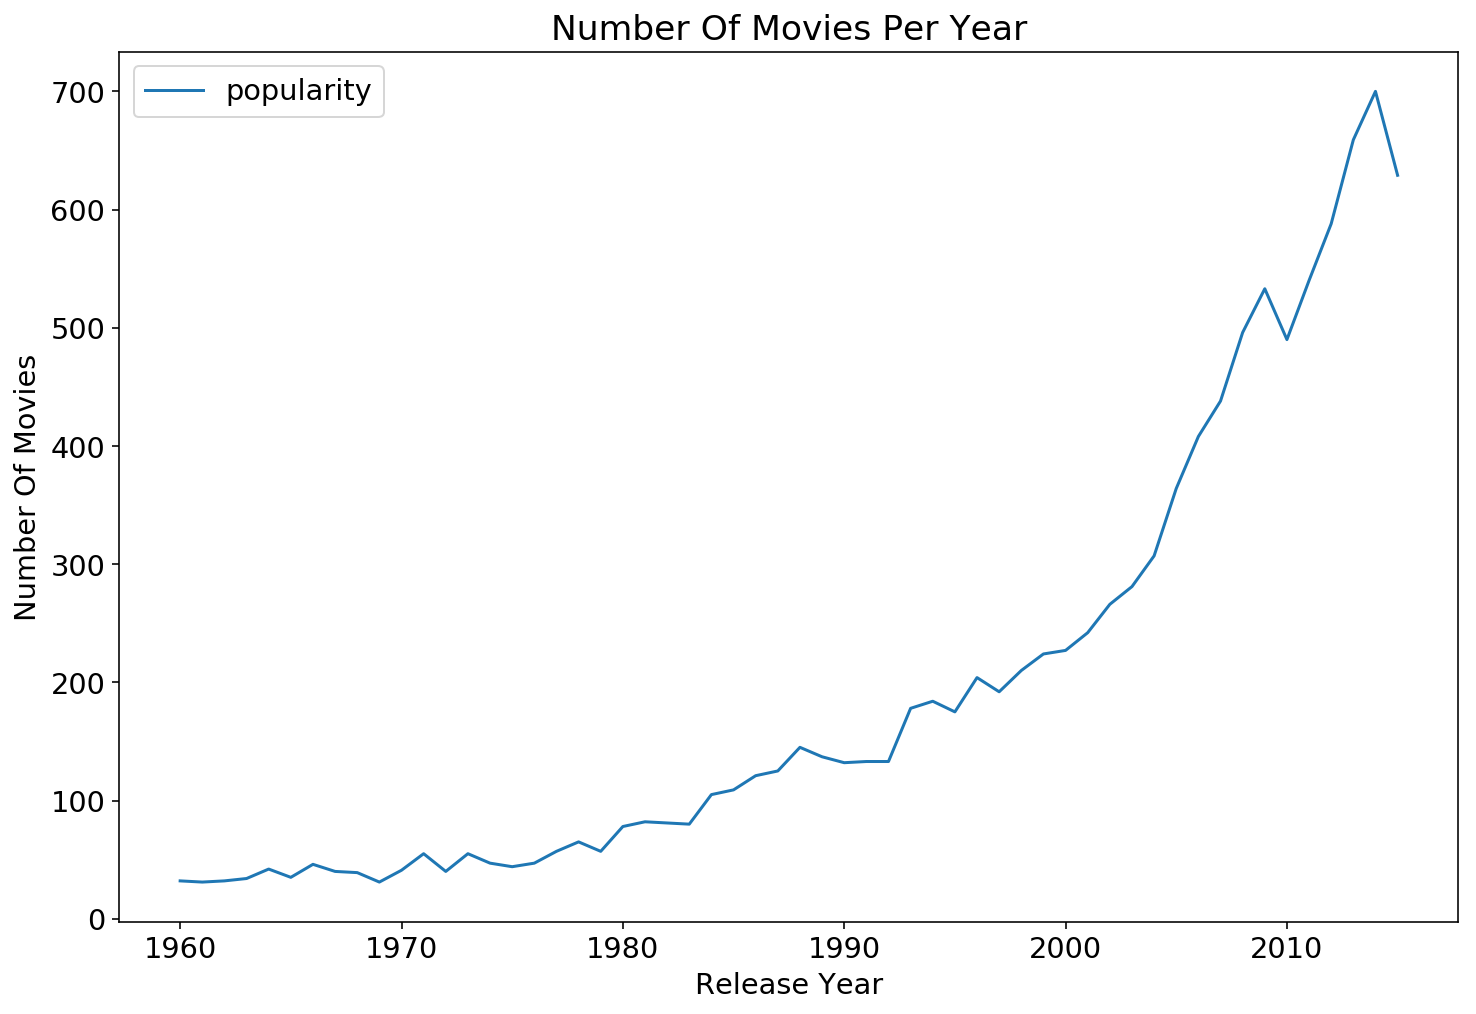

In [62]:
#we know that popularity column has no nulls
#so use it for counting the number of movies
ax = df.groupby('release_year')['popularity'].count().plot(figsize=(12, 8))
#set titles and labels
plt.title('Number Of Movies Per Year')
plt.ylabel('Number Of Movies')
plt.legend()
plt.xlabel("Release Year");

It is connected to the fact that the number of movies every year increased accordingly.

In [65]:
#assinging new dataframe which holds values only of movies having profit $50M or more
profit_movie_data = dfp[dfp['profit'] >= 50000000]

#reindexing new dataframe
profit_movie_data.index = range(len(profit_movie_data))
#will initialize dataframe from 1 instead of 0
profit_movie_data.index = profit_movie_data.index + 1

In [66]:
#since we have multiple questions answers being similar in logic and code, we will give function which will make our life easier

#function which will take any column as argument from which data is need to be extracted and keep track of count
def extract_data(column_name):
    #will take a column, and separate the string by '|'
    all_data = profit_movie_data[column_name].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    all_data = pd.Series(all_data.split('|'))
    
    #this will us value in descending order
    count = all_data.value_counts(ascending = False)
    
    return count

In [68]:
genre_count = extract_data('genres')
genre_count.head()

Drama        579
Comedy       554
Action       515
Thriller     462
Adventure    418
dtype: int64

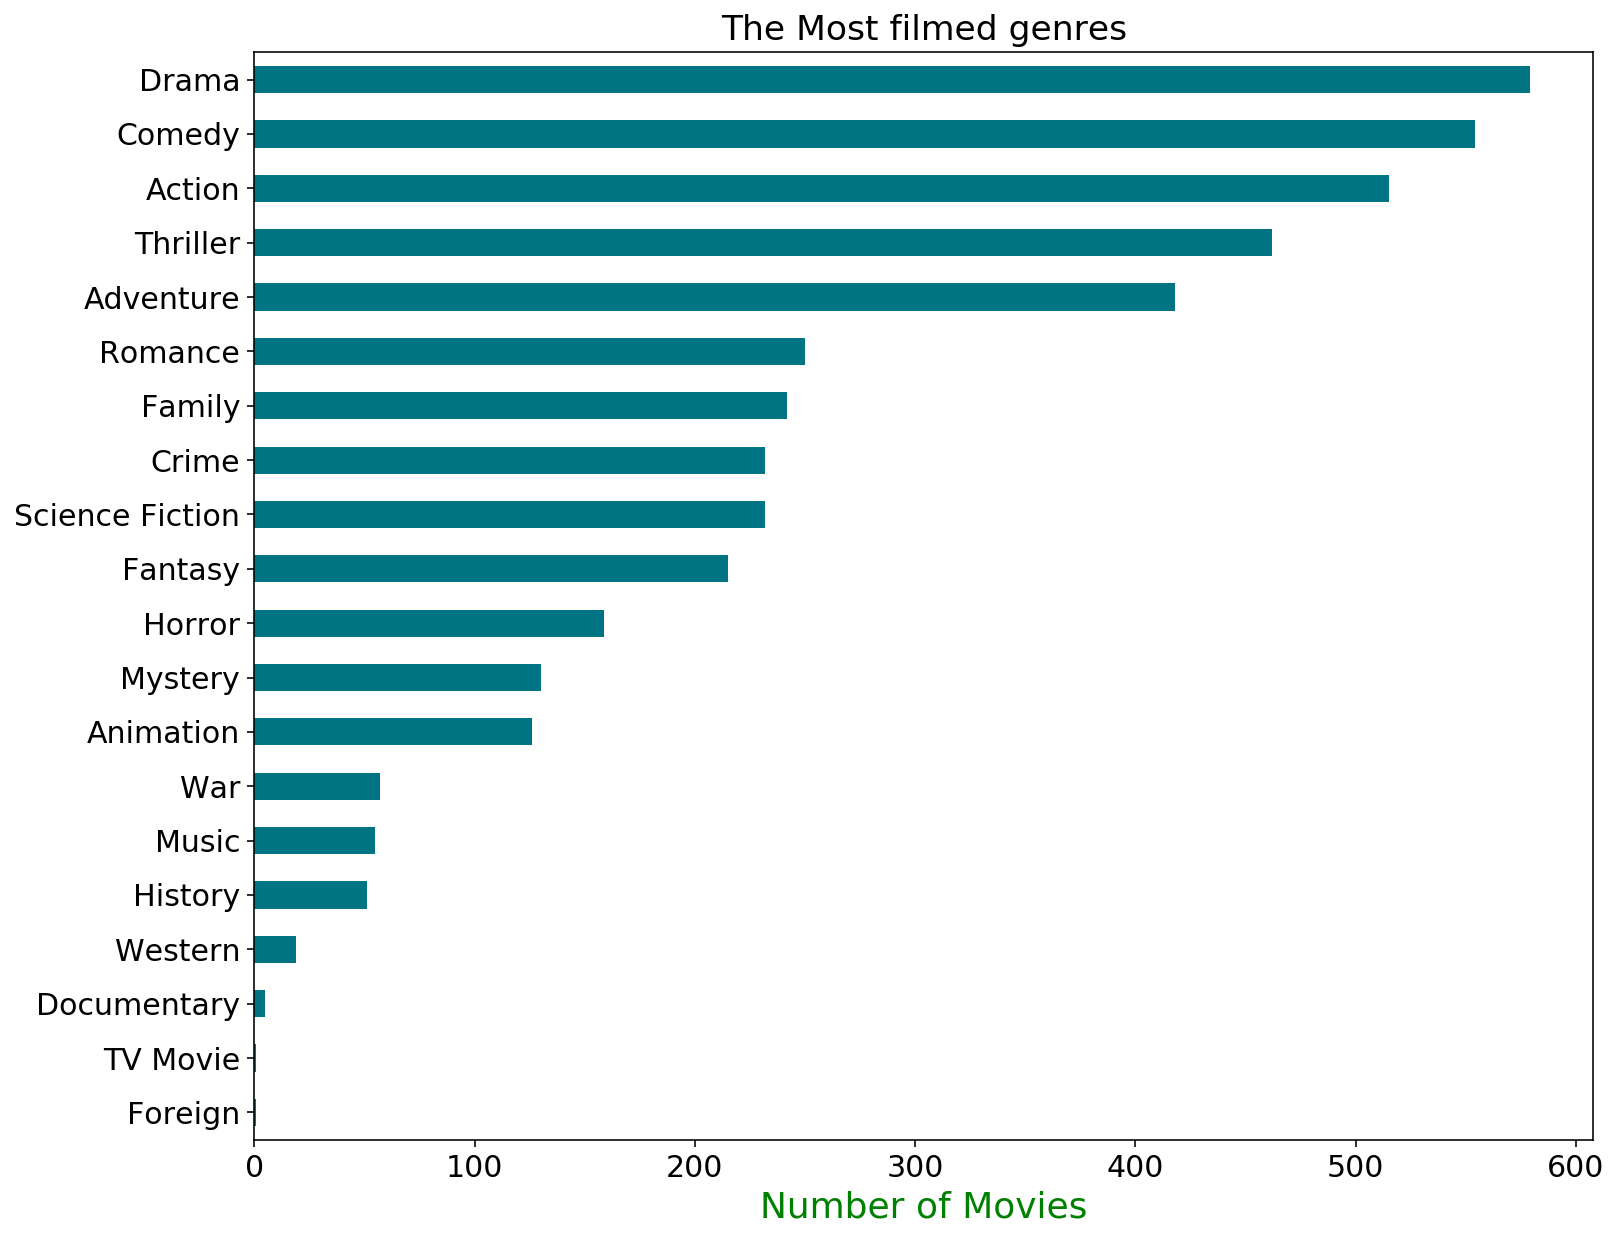

In [69]:
#we want plot to plot points in descending order top to bottom
#since our count is in descending order and graph plot points from bottom to top, our graph will be in ascending order form top to bottom
#hence lets give the series in ascending order
genre_count.sort_values(ascending = True, inplace = True)

#initializing plot
ax = genre_count.plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'The Most filmed genres')

#x-label
ax.set_xlabel('Number of Movies', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

Another amazing results. Action, Drama and Comedy genres are the most as visualized but Comedy takes the prize, about 492 movies have genres comedy which make $50M+ in profit. In comparison, even `Adventure` and `Thriller` really play the role. These five genres have more number of movies than rest of the genres as shown by visualization. Probability of earning more than \$50M for these genres are higher, but still other genres do count too again it depends on lots of other influential factors that come in play. Western, war, history, music, documentary and the most least foreign genres have less probability to make this much in profit as in comparison to other genre.

This also doesn't prove that if you have a movie with an Action, comedy and drama genre in it will have a guarantee to make more than $50M but it would have a significant interest and attraction to the population.

Let's find one more key characteristic of these movies.

### Which month released highest number of movies in all of the years? And which month made the most profit?

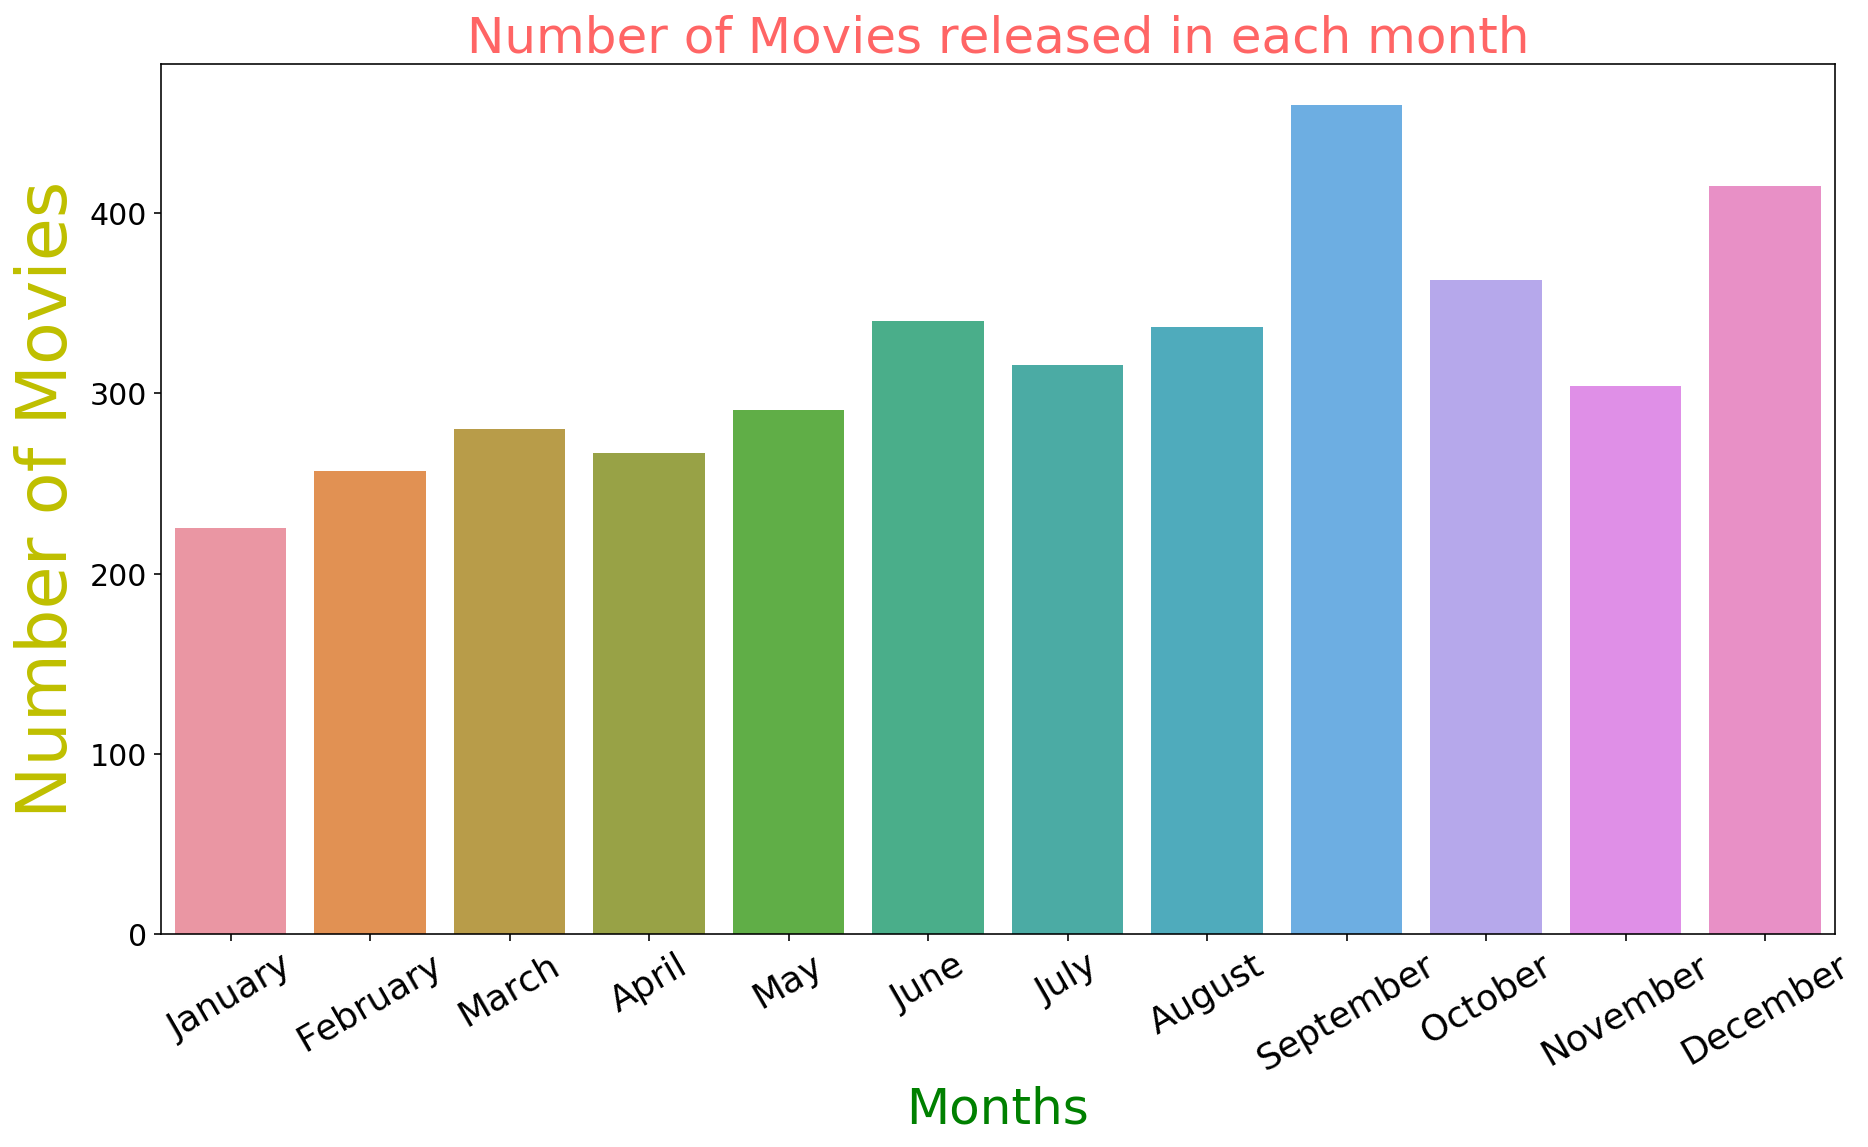

In [72]:
#for answering this question we need to group all of the months of years and then calculate the profits of those months
#giving a new dataframe which gives 'release-date' as index
index_release_date = dfp.set_index('release_date')

#now we need to group all the data by month, since release date is in form of index, we extract month from it
groupby_index = index_release_date.groupby([(index_release_date.index.month)])

#this will give us how many movies are released in each month
monthly_movie_count = groupby_index['profit'].count()

#converting table to a dataframe
monthly_movie_count= pd.DataFrame(monthly_movie_count)

#giving a list of months
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthly_movie_count_bar = sns.barplot(x = monthly_movie_count.index, y = monthly_movie_count['profit'], data = monthly_movie_count)

#setting size of the graph
monthly_movie_count_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_movie_count_bar.axes.set_title('Number of Movies released in each month', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_movie_count_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_movie_count_bar.set_ylabel("Number of Movies", color="y", fontsize = 35)

#customizing axes values
monthly_movie_count_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_movie_count_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

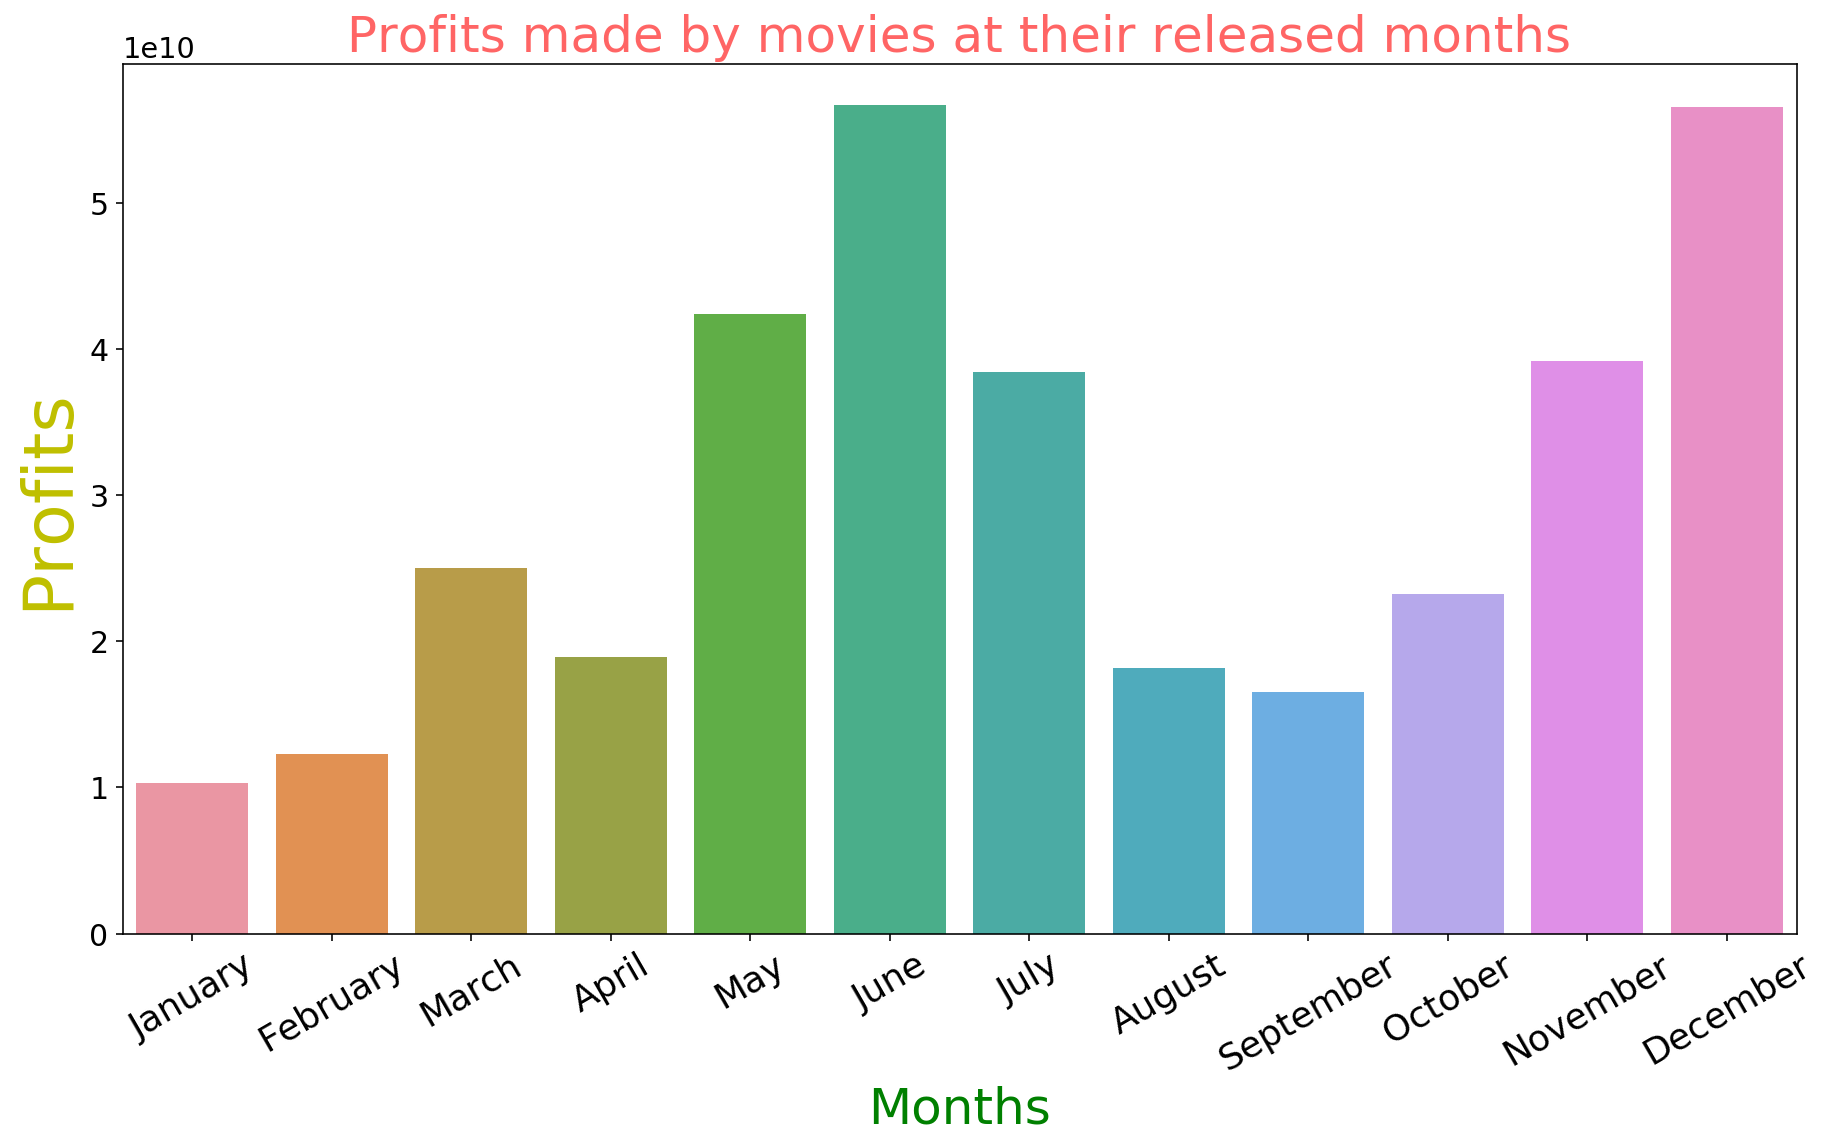

In [74]:
#finding the second part of this question

#now since the data is grouped by month, we add 'profit' values to respective months, saving all this to a new var
monthly_profit = groupby_index['profit'].sum()

#converting table to a dataframe
monthly_profit = pd.DataFrame(monthly_profit)

#giving seaborn bar plot to visualize the data
#giving values to our graph
monthly_profit_bar = sns.barplot(x = monthly_profit.index, y = monthly_profit['profit'], data = monthly_profit)

#setting size of the graph
monthly_profit_bar.figure.set_size_inches(15,8)

#setting the title and customizing
monthly_profit_bar.axes.set_title('Profits made by movies at their released months', color="r", fontsize = 25, alpha = 0.6)

#setting x-label
monthly_profit_bar.set_xlabel("Months", color="g", fontsize = 25)
#setting y-label
monthly_profit_bar.set_ylabel("Profits", color="y", fontsize = 35)

#customizing axes values
monthly_profit_bar.tick_params(labelsize = 15, labelcolor="black")

#rotating the x-axis values to make it readable
monthly_profit_bar.set_xticklabels(month_list, rotation = 30, size = 18)

#shows the plot
plt.show()

Seeing the both visualizations of both graphs we see similar trend. Where there are more movie released there is more profit and vice versa but just not for one month i.e December. December is the month where most movie release but when compared to profits it ranks second. This means that december month has high release rate but less profit margin. The month of June where we have around 165 movie releases, which is second highest, is the highest in terms of making profits.

Also one more thing is we earlier finded which movie had made the most profit in our dataset, We came up with the answer of movie, 'Avatar', and the release month for this movie is in december, also the highest in loss movie had also released in december but that isn't being counted here. Knowing this that you have the highest release rate and highest profit making movie in same month of December but falls short in front of June month in terms of making profits makes me think that the month of June had movies with significant high profits where in december it didn't had that much high, making it short in terms of profit even though having the advantage of highest release rate.

This visualization doesn't prove us that if we release a movie in those months we will earn more $50M. It just makes us think that the chances are higher, again it depends on other influential factors, such as directors, story, cast etc.

<a id='conclusions'></a>
## Conclusions

Finally, we can summarize our findings and answer questions from the Introduction section.
By looking at animated bar charts of genres and popularity, we can watch how movie trends changed over the years.

**Animation** and **Adventure** were the most popular genres and they competed with each other for the whole period of time.
The least popular genres were **Documentary** and **Foreign**.

**TV Movie** was popular before 1970 but then rapidly became extremely unpopular.

**Science Fiction** was extremely unpopular before 1970 but then rapidly became one of the most popular genres.

**Fantasy** gradually increased in popularity and became very popular recently.

**Properties of highly profitable movies:**
* High budget.
* High popularity.
* The genre was one of these: "Animation", "Adventure", "Family", "Fantasy" and "Science Fiction".
* The production company was one of these: "Hoya Productions", "Truenorth Productions", "Alfran Productions".
* The cast of the movie included one of these actors: "Jason Miller", "Robert MacNaughton", "Daisy Ridley".
* The release year was prior to the 1980s.

### If I wanted to show one of the best and most profitable movie, who would I hire as director and cast, which genre would I choose and also at what month would I release the movie in?

* Choose any director from this - Steven Spielberg, Robert Zemeckis, Ron Howard, Tony Scott, Ridley Scott.
* Choose any cast from this - Actors - Tom Cruise, Brad Pitt, Tom Hanks, Sylvester Stallone, Denzel Washington.
* Actress - Julia Roberts, Anne Hathaway, Angelina Jolie, Scarlett Johansson.
* Choose these genre - Action, Adventure, Thriller, Comedy, Drama.
* Choose these release months - May, June, July, November, December.

**Limitations**:

* It's not 100 percent guaranteed solution that this formula is going to work, meaning we are going to earn more than 50M USD! But it shows us that we have high probability of making high profits if we had similar characteristics as such. 

* All these directors, actors, genres and released dates have a common trend of attraction. If we release a movie with these characteristics, it gives people high expectations from this movie. Thus attracting more people towards the movie but it ultimately comes down to story mainly and also other important influential factors. People having higher expectations gives us less probability of meeting their expectations. Even if the movie was worth, people's high expectations would lead in biased results ultimately effecting the profits. We also see this in real life specially in sequels of movies. This was just one example of an influantial factor that would lead to different results, there are many that have to be taken care of.

In [76]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0